In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('discret.csv')
c = np.array(df.iloc[:,3:])
df

,Lat,Long,Region,31/03/20,07/04/20,15/04/20,22/04/20,30/04/20,07/05/20,15/05/20,...,22/06/20,30/06/20,07/07/20,15/07/20,22/07/20,31/07/30,07/08/20,15/08/20,22/08/20,30/08/20
0,"-21,50216466","45,20566584",Androy,1,1,1,1,1,1,1,...,1,1,1,1,1,4,1,4,1,4
1,"-25,0333332","46,9833294",Anôsy,1,1,1,1,2,1,1,...,1,1,1,1,3,3,3,3,2,2
2,"-23,35","43,66667",Atsimo_Andrefana,1,2,1,1,2,1,1,...,1,1,1,4,4,3,4,3,2,3
3,"-22,40293","46,12576",Ihorombe,1,1,1,1,1,1,1,...,1,1,1,2,1,2,3,1,3,4
4,"-20,28416553","44,31716538",Menabe,1,1,1,1,1,1,1,...,1,1,2,1,2,1,4,4,4,3
5,"-17,166666","49,2999988",Analanjirofo,1,1,2,1,1,1,1,...,4,3,2,3,4,3,2,1,1,1
6,"-12,2666656","49,2833322",Diana,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,4,4,4
7,"-14,8833298","50,2833322",Sava,1,1,1,1,1,1,1,...,1,2,1,2,1,4,3,3,4,4
8,"-14,87239818","47,9833994",Sofia,1,1,1,1,1,1,1,...,1,1,1,2,2,3,3,3,3,4
9,"-15,71667","46,31667",Boeny,1,1,1,1,1,1,1,...,1,2,2,2,4,4,4,4,2,2


In [3]:
class Markov(object):
    def __init__(self, class_ids):
        self.classes = np.unique(class_ids)
        class_ids = np.array(class_ids)
        n, t = class_ids.shape
        k = len(self.classes)
        self.k = k
        js = list(range(t - 1))

        classIds = self.classes.tolist()
        transitions = np.zeros((k, k))
        for state_0 in js:
            state_1 = state_0 + 1
            state_0 = class_ids[:, state_0]
            state_1 = class_ids[:, state_1]
            initial = np.unique(state_0)
            for i in initial:
                ending = state_1[state_0 == i]
                uending = np.unique(ending)
                row = classIds.index(i)
                for j in uending:
                    col = classIds.index(j)
                    transitions[row, col] += sum(ending == j)
        self.transitions = transitions
        row_sum = transitions.sum(axis=1)
        self.p = np.dot(np.diag(1 / (row_sum + (row_sum == 0))), transitions)

In [4]:
ma = Markov(c)
tr = ma.transitions
ma.p

array([[0.83011583, 0.11196911, 0.01158301, 0.04633205],
       [0.23076923, 0.53846154, 0.15384615, 0.07692308],
       [0.025     , 0.275     , 0.3       , 0.4       ],
       [0.1       , 0.14      , 0.32      , 0.44      ]])

#  Algorithme de Metropolis-Hastings à noyau gaussien

In [5]:
T = np.array([[150,45],[140,25]])
T

array([[150,  45],
       [140,  25]])

In [8]:
def likelihood(p1,p2):
    return ((1-(p1))**T[0,0])*(p1**T[0,1])*((1-p2)**T[1,0])*(p2**T[1,1])

In [15]:
def posterior(p):
    return likelihood(p,p2)*stats.uniform.pdf(p)

In [16]:
def propo(p):
    return stats.norm.pdf(p)

In [17]:
def acceptance_ratio(p, p_new):
    return min(1, ((posterior(p_new) / posterior(p)) * (propo(p - p_new) / propo(p_new - p)) ))

In [18]:
results = []
p1 = np.random.uniform(0,1)
p2 = 0.85

n_samples = 25000
burn_in = 5000
lag = 5

for i in range(n_samples):
    eps = np.random.normal(0,0.5)
    
    p_new2 = p2 
    p_new1 = p1 +  eps
   
    #p_new[1] = p[1] + eps1
    R = acceptance_ratio(p1,p_new1)
    #R2 = acceptance_ratio(p2,p_new2)

    u = np.random.random_sample()
    if u < R:
        p1 = p_new1
        
    if i > burn_in and i%lag == 0:
        results.append(p1)

0.2340585287734751

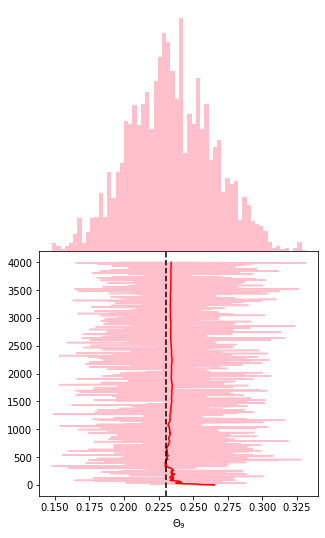

In [20]:
plt.figure(figsize=(5,9))
plt.gcf().subplots_adjust(hspace = 0)
plt.subplot(2,1,1)
plt.hist(results,color='pink',bins=60)
plt.axis('off')
plt.subplot(2,1,2)
plt.plot(results,range(len(results)),color='pink')
plt.plot(np.cumsum(results)/range(1,len(results)+1),range(len(results)),color='red')
plt.axvline(x=0.23, color='black',linestyle='--')
plt.xlabel("$\Theta_{9}$")
plt.show
#plt.savefig("theta9.jpg",dpi=200)
sum(results)/len(results)

In [505]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

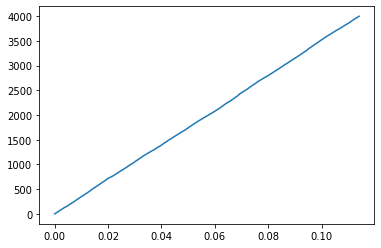

In [83]:
plt.plot(np.cumsum(results)/len(np.cumsum(results)),range(3999))